# Example

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
% matplotlib inline

from madminer.madminer import MadMiner

## 1. Create MadMiner object

In [2]:
miner = MadMiner()

## 2. Define parameter space

In [3]:
miner.set_parameters()

miner.add_parameter(
    lha_block='ANOINPUTS',
    lha_id=3,
    parameter_name='fW',
    morphing_max_power=4,
    morphing_parameter_range=(-1.,1.)
)
miner.add_parameter(
    lha_block='ANOINPUTS',
    lha_id=7,
    parameter_name='fWW',
    morphing_max_power=4,
    morphing_parameter_range=(-1.,1.)
)

## 3a. Define benchmark points manually

In [4]:
miner.add_benchmark(
    {'fW':0., 'fWW':0.},
    'sm'
)

In [9]:
miner.benchmarks

OrderedDict([('morphing_basis_vector_0',
              OrderedDict([('fW', 0.0), ('fWW', 0.0)])),
             ('morphing_basis_vector_1',
              OrderedDict([('fW', -0.3096512422427262),
                           ('fWW', 0.9907387243636991)])),
             ('morphing_basis_vector_2',
              OrderedDict([('fW', 0.875516152826618),
                           ('fWW', -0.8834979001967336)])),
             ('morphing_basis_vector_3',
              OrderedDict([('fW', -0.8232616384808373),
                           ('fWW', 0.41397918642218867)])),
             ('morphing_basis_vector_4',
              OrderedDict([('fW', -0.29130419173292266),
                           ('fWW', -0.9810342112384063)])),
             ('morphing_basis_vector_5',
              OrderedDict([('fW', 0.6602923440617599),
                           ('fWW', 0.44915536006672885)])),
             ('morphing_basis_vector_6',
              OrderedDict([('fW', 0.9470631555744315),
                        

## 3b. Define benchmark points through morphing

In [5]:
miner.set_benchmarks_from_morphing(keep_existing_benchmarks=True,
                                   n_bases=1,
                                   n_trials=4000,
                                   n_test_thetas=4000)
morpher = miner.morpher
basis = morpher.current_basis

In [6]:
xi = np.linspace(-1.,1.,100)
yi = np.linspace(-1.,1.,100)
xx, yy = np.meshgrid(xi, yi)
xx = xx.reshape((-1,1))
yy = yy.reshape((-1,1))
theta_test = np.hstack([xx, yy])

squared_weights = []

for theta in theta_test:
    wi = morpher._calculate_morphing_weights(theta, None)
    squared_weights.append(np.sum(wi*wi)**0.5)
    
squared_weights = np.array(squared_weights).reshape((100,100))

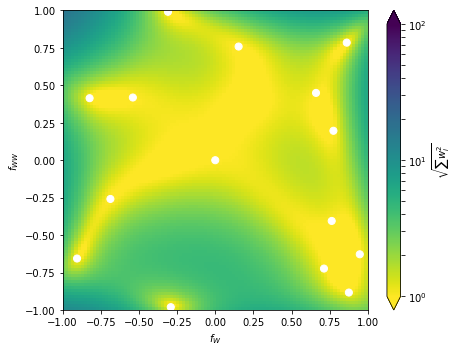

In [7]:
fig = plt.figure(figsize=(6.5,5))
ax = plt.gca()

colors = []
for c in ['white', 'black', 'yellow', 'green', 'blue', 'red'][:morpher.n_bases]:
    colors += [c] * morpher.n_components

pcm = ax.pcolormesh(xi, yi, squared_weights,
                   norm=matplotlib.colors.LogNorm(vmin=1., vmax=1.e2),
                   cmap='viridis_r')
cbar = fig.colorbar(pcm, ax=ax, extend='both')

plt.scatter(basis[:,0], basis[:,1], s=50., c=colors)

plt.xlabel(r'$f_W$')
plt.ylabel(r'$f_{WW}$')
cbar.set_label(r'$\sqrt{\sum w_i^2}$')
plt.xlim(-1.,1.)
plt.ylim(-1.,1.)

plt.tight_layout()
plt.show()

## 4. Export parameter and reweight cards, integrating along two different scenarios

In [8]:
miner.export_cards(
    'templates/param_card_template.dat',
    'templates/reweight_card_template.dat',
    'MG_process_1',
    sample_benchmark='sm'
)

KeyError: 'sm'